# Predicting used car prices




## Import libraries


In [ ]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


## Read dataset


In [ ]:
dataset = pd.read_csv("train_data.csv")
dataset.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
test_dataset = pd.read_csv("test_data.csv")
test_dataset.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mahindra XUV500 W6 2WD,Kochi,2017,41290,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,10.94
1,BMW 5 Series 520d Luxury Line,Delhi,2013,65000,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,67.87 Lakh,21.26
2,Toyota Corolla Altis 1.8 G,Bangalore,2016,16471,Petrol,Manual,Second,14.28 kmpl,1798 CC,138.03 bhp,5.0,20.48 Lakh,11.50
3,Hyundai i20 Asta 1.4 CRDi,Pune,2015,54339,Diesel,Manual,Second,22.54 kmpl,1396 CC,88.73 bhp,5.0,NaN,6.00
4,Mahindra KUV 100 mFALCON G80 K2,Hyderabad,2016,24025,Petrol,Manual,First,18.15 kmpl,1198 CC,82 bhp,6.0,NaN,4.10


**DATA VISUALIZATION**

In [ ]:
combine = dataset

In [ ]:
curr_time = datetime.datetime.now()
combine['Year'] = combine['Year'].apply(lambda x : curr_time.year - x)


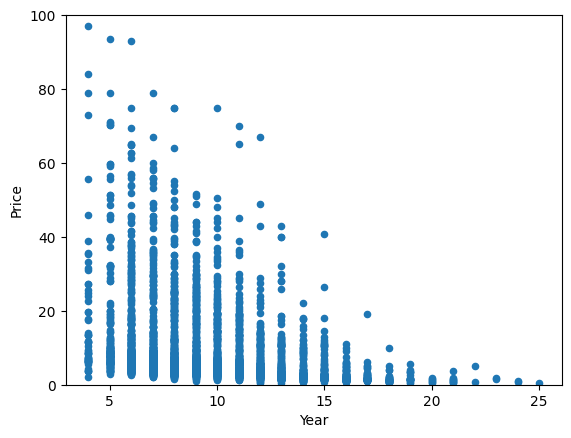

In [ ]:
attrib = 'Year'
data = pd.concat([combine['Price'], combine[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price', ylim=(0,100));

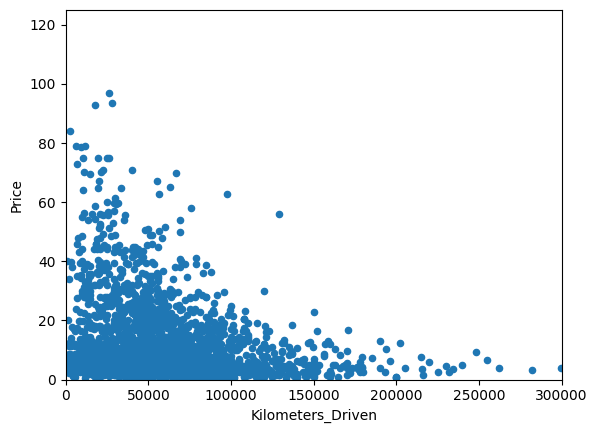

In [ ]:
attrib = 'Kilometers_Driven'
data = pd.concat([combine['Price'], combine[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price', ylim=(0, 125), xlim=(0, 300000))
plt.show()

In [ ]:
mileage_train = combine["Mileage"].str.split(" ", expand = True)

combine["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')

In [ ]:
combine["Mileage"].fillna(combine["Mileage"].astype("float64").mean(), inplace = True)

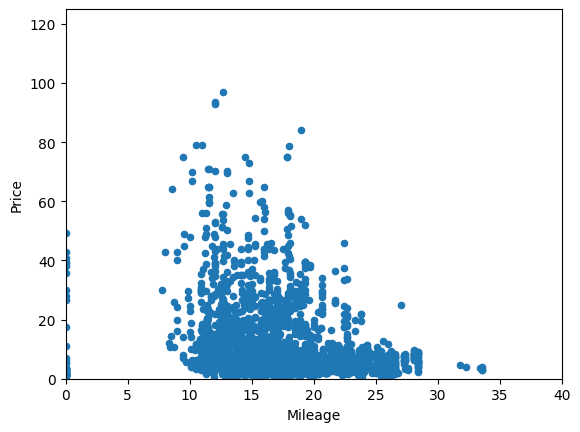

In [ ]:
attrib = 'Mileage'
data = pd.concat([combine['Price'], combine[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price', ylim=(0, 125), xlim=(0, 40))
plt.show()

In [ ]:
bhp_train = combine["Power"].str.split(" ", expand = True)
combine["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')

In [ ]:
combine["Power"].fillna(combine["Power"].astype("float64").mean(), inplace = True)

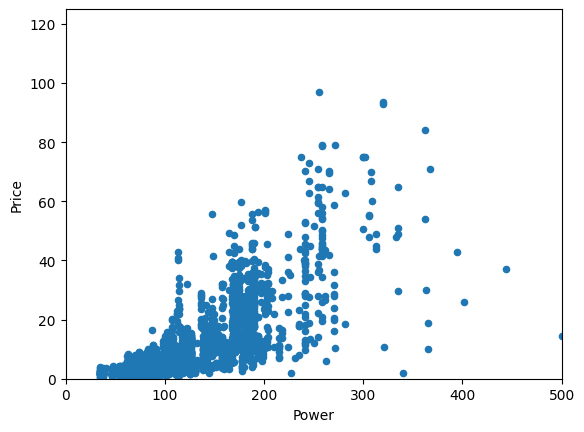

In [ ]:
attrib = 'Power'
data = pd.concat([combine['Price'], combine[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price', ylim=(0, 125), xlim=(0, 500))
plt.show()

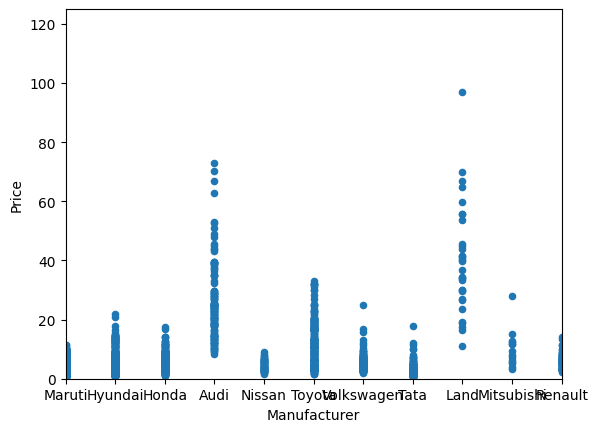

In [ ]:
attrib = 'Manufacturer'
data = pd.concat([combine['Price'], combine[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price', ylim=(0, 125), xlim=(0, 10))
plt.show()

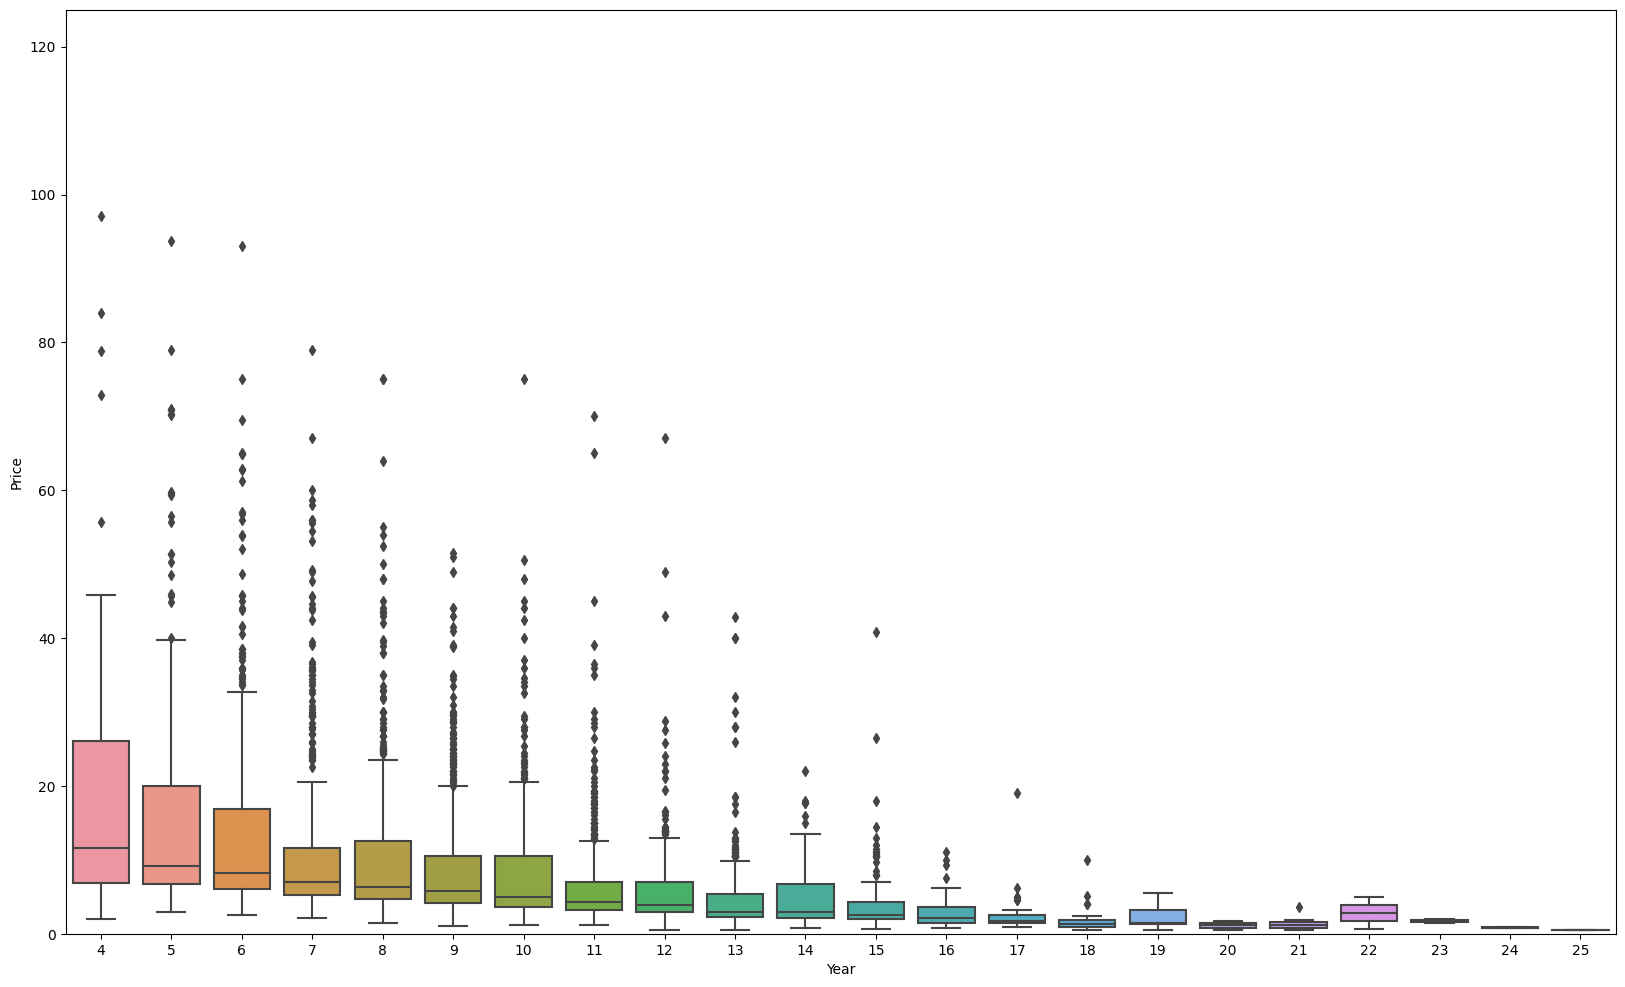

In [ ]:
attrib = 'Year'
data = pd.concat([combine['Price'], combine[attrib]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=attrib, y="Price", data=data)
fig.axis(ymin=0, ymax=125);

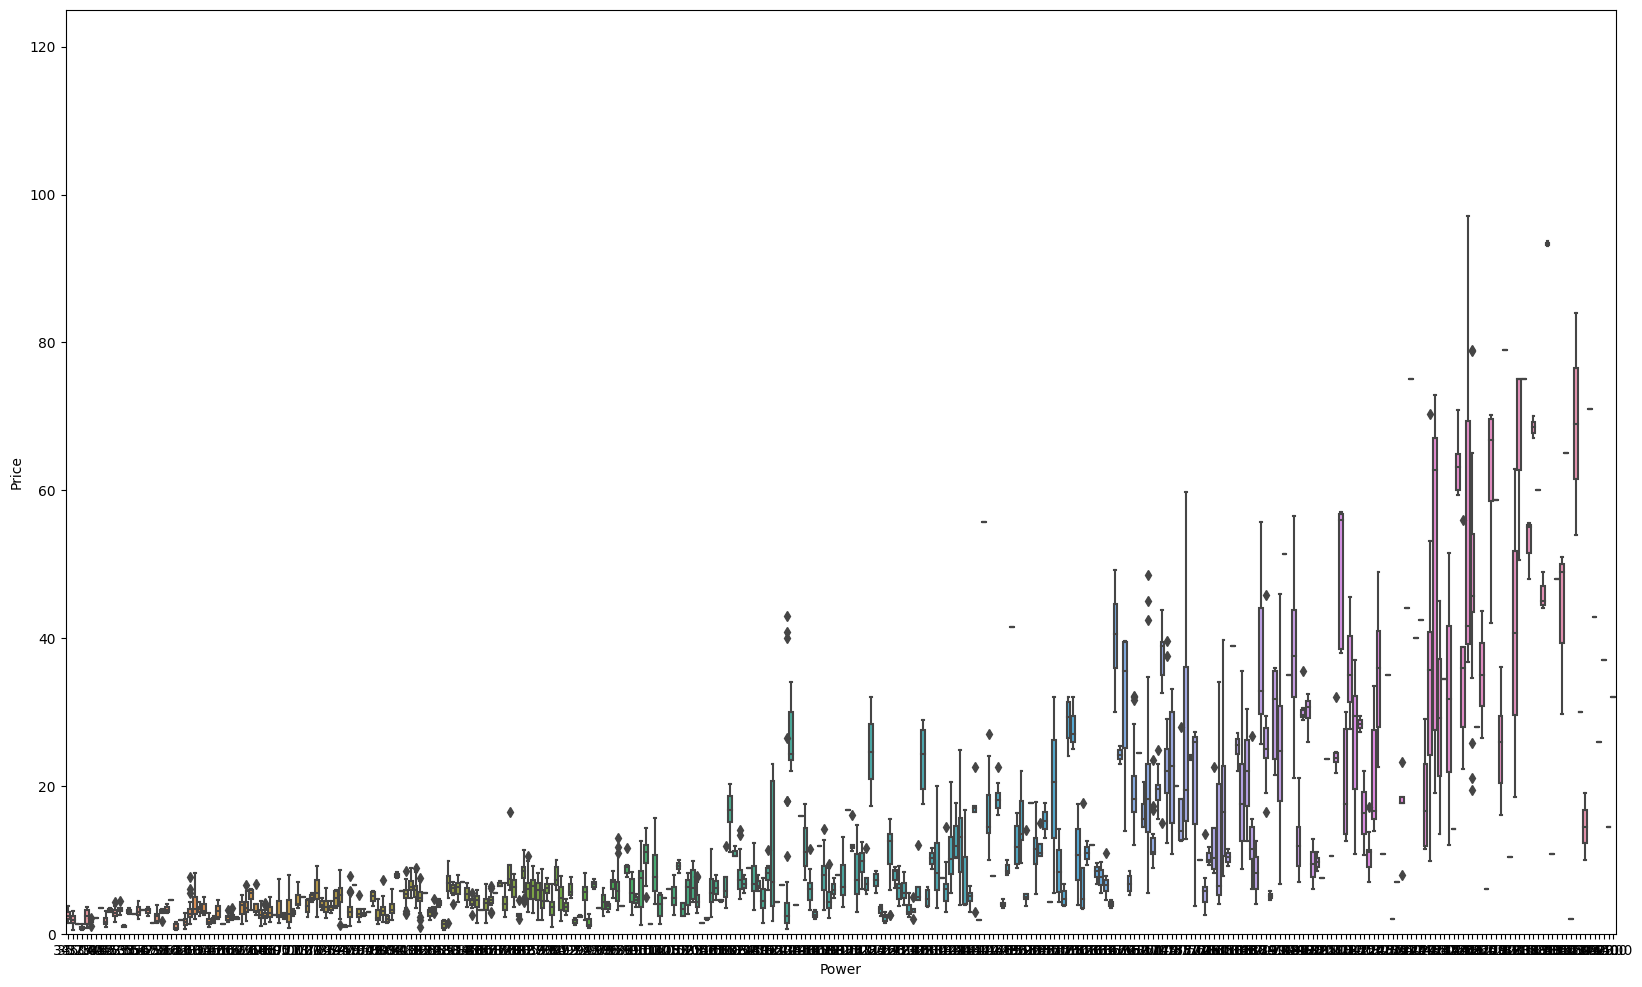

In [ ]:
attrib = 'Power'
data = pd.concat([combine['Price'], combine[attrib]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=attrib, y="Price", data=data)
fig.axis(ymin=0, ymax=125);

In [ ]:
make_train = combine["Name"].str.split(" ", expand = True)

In [ ]:
combine["Manufacturer"] = make_train[0]

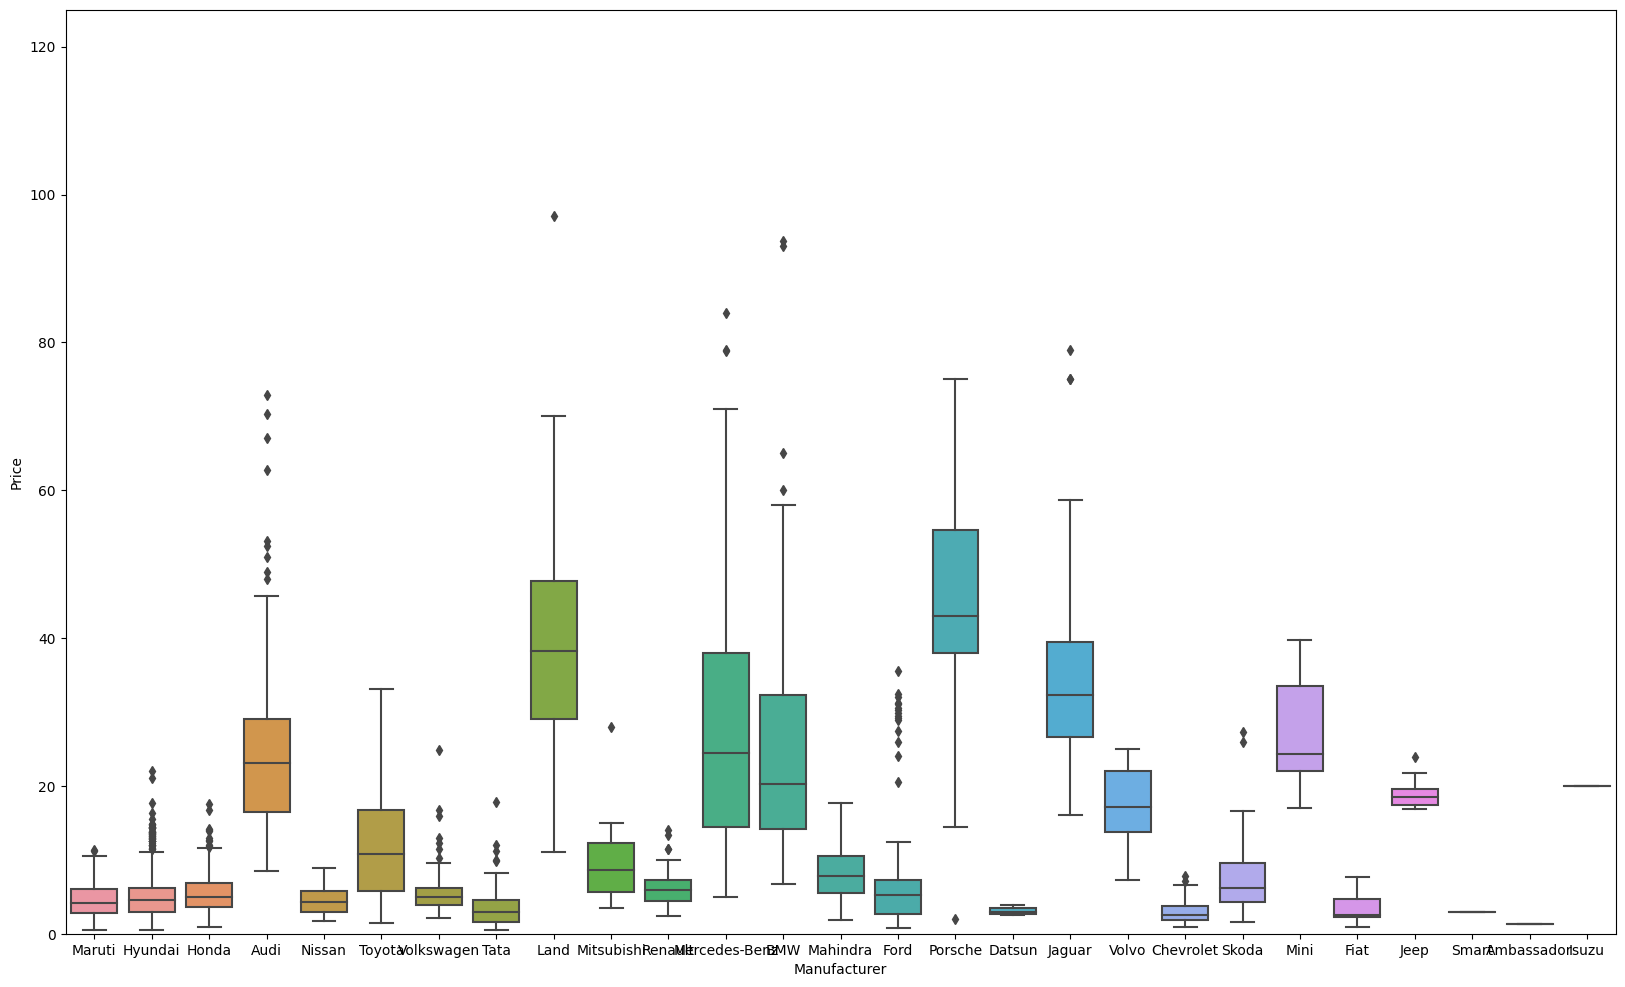

In [ ]:
attrib = 'Manufacturer'
data = pd.concat([combine['Price'], combine[attrib]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=attrib, y="Price", data=data)
fig.axis(ymin=0, ymax=125);

In [ ]:
print("Find most important features relative to target")
corr = combine.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)


Find most important features relative to target
Price                1.000000
Power                0.765488
Engine               0.651719
Seats                0.062123
Kilometers_Driven    0.016395
Mileage             -0.300912
Year                -0.329564
Name: Price, dtype: float64


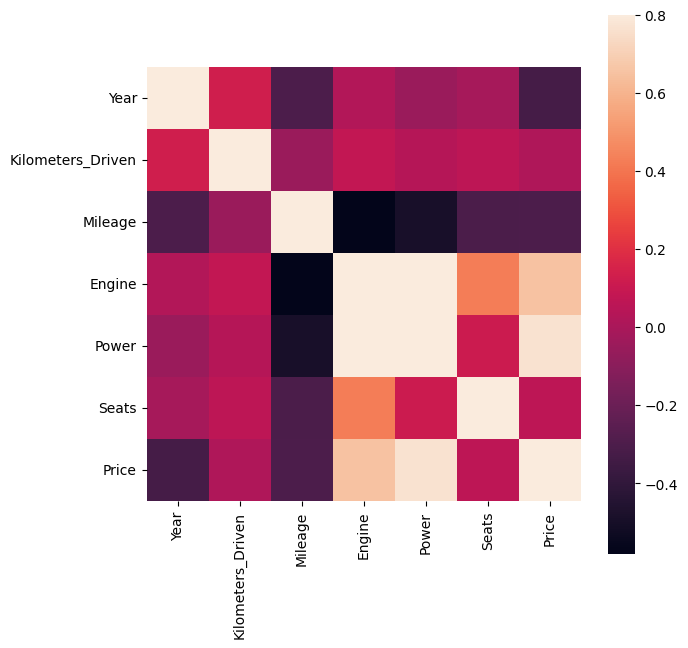

In [ ]:
corrmat = combine.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True);


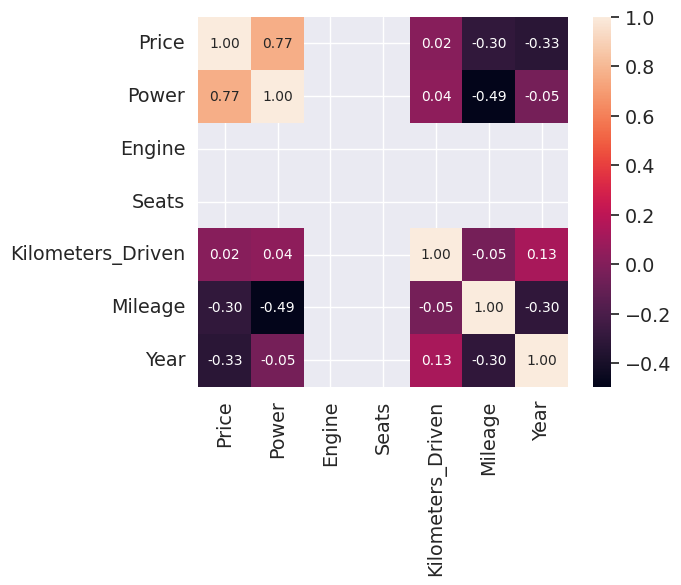

In [ ]:
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(combine[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


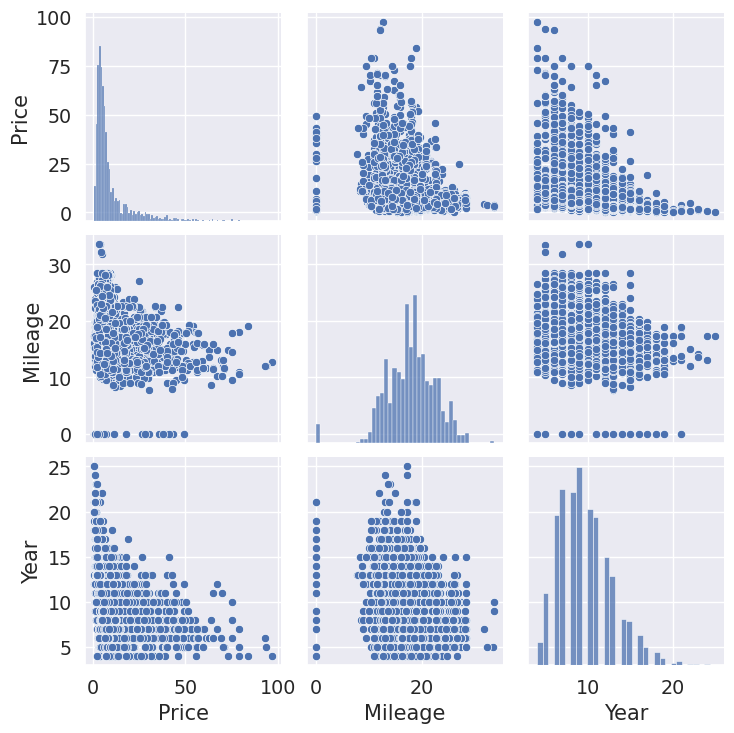

In [ ]:
num_features = ["Price", "Mileage", "Year"]
sns.pairplot(combine[num_features], size = 2.5)
plt.show();

**TRAIN TEST SPLIT**

In [ ]:
X_train = dataset.iloc[:,:-1]
y_train = dataset.iloc[:,-1]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3499 non-null   object 
 1   Location           3499 non-null   object 
 2   Year               3499 non-null   int64  
 3   Kilometers_Driven  3499 non-null   int64  
 4   Fuel_Type          3499 non-null   object 
 5   Transmission       3499 non-null   object 
 6   Owner_Type         3499 non-null   object 
 7   Mileage            3499 non-null   object 
 8   Engine             3477 non-null   object 
 9   Power              3477 non-null   object 
 10  Seats              3474 non-null   float64
 11  New_Price          481 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 328.2+ KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3499 entries, 0 to 3498
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
3499 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB


In [ ]:
X_test = test_dataset.iloc[:,:-1]
y_test = test_dataset.iloc[:,-1]

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2520 non-null   object 
 1   Location           2520 non-null   object 
 2   Year               2520 non-null   int64  
 3   Kilometers_Driven  2520 non-null   int64  
 4   Fuel_Type          2520 non-null   object 
 5   Transmission       2520 non-null   object 
 6   Owner_Type         2520 non-null   object 
 7   Mileage            2518 non-null   object 
 8   Engine             2506 non-null   object 
 9   Power              2506 non-null   object 
 10  Seats              2503 non-null   float64
 11  New_Price          343 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 236.4+ KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2520 entries, 0 to 2519
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
2520 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB


## Exploratory Data Analysis


### Index

The first column is the index for each data point and hence we can simply remove it.

In [ ]:
# X_train = X_train.iloc[:, 1:]
# X_test = X_test.iloc[:, 1:]

### Name



In [ ]:
X_train["Name"].value_counts()

Maruti Swift VDI                               27
Mahindra XUV500 W8 2WD                         26
Maruti Swift VDI BSIV                          23
Maruti Ritz VDi                                23
Hyundai i10 Sportz                             20
                                               ..
Ford Figo Petrol LXI                            1
Maruti Ciaz 1.4 AT Alpha                        1
Honda City 1.3 DX                               1
Ford EcoSport 1.0 Ecoboost Titanium Plus BE     1
Hyundai Xcent 1.1 CRDi S Option                 1
Name: Name, Length: 1451, dtype: int64

extracting manufacturer


In [ ]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

In [ ]:
make_train.head(5)

,0,1,2,3,4,5,6,7,8,9
0,Maruti,Wagon,R,LXI,CNG,None,None,None,None,None
1,Hyundai,Creta,1.6,CRDi,SX,Option,None,None,None,None
2,Honda,Jazz,V,None,None,None,None,None,None,None
3,Maruti,Ertiga,VDI,None,None,None,None,None,None,None
4,Audi,A4,New,2.0,TDI,Multitronic,None,None,None,None


In [ ]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

search null values


Text(0, 0.5, 'Count of cars')

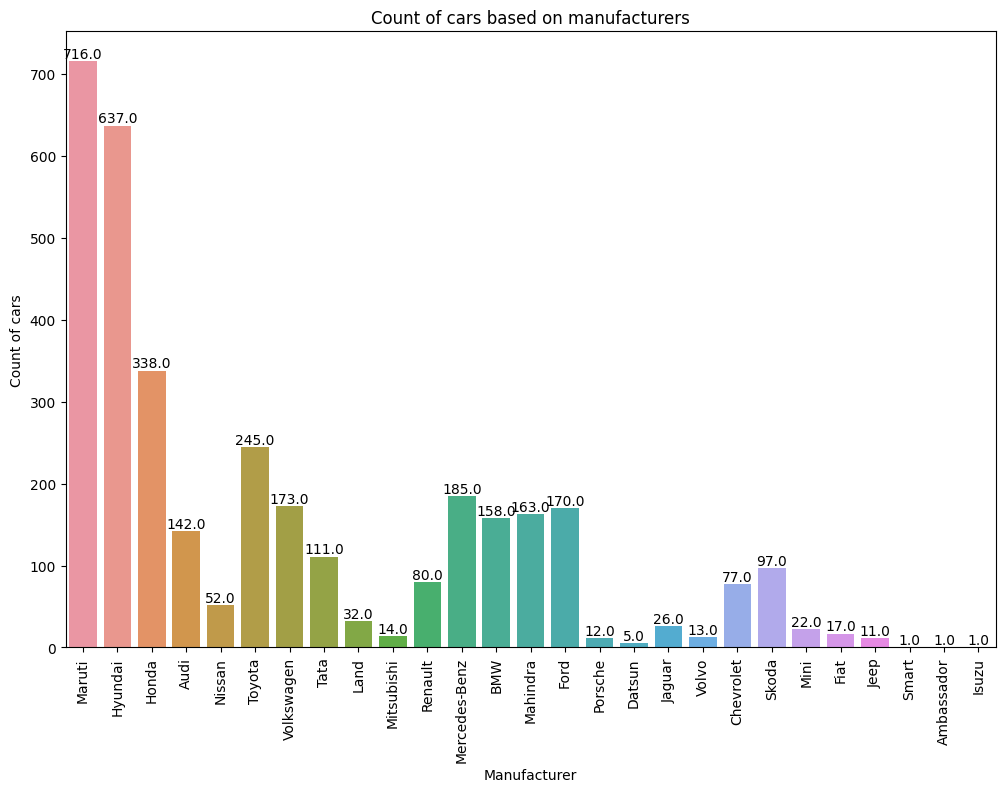

In [ ]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [ ]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

### Location

In [ ]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year



In [ ]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

In [ ]:
X_train.head(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Manufacturer
0,13,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,Maruti
1,8,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,Hyundai
2,12,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,Honda
3,11,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,Maruti
4,10,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,Audi


### Fuel_Type, Transmission,  and Owner_Type


### Kilometers_Driven


In [ ]:
X_train["Kilometers_Driven"]

0       72000
1       41000
2       46000
3       87000
4       40670
        ...  
3494    83678
3495    91000
3496    50000
3497    58000
3498    80000
Name: Kilometers_Driven, Length: 3499, dtype: int64

## Mileage


In [ ]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

missing values.

In [ ]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
2


handle missing value

In [ ]:
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

In [ ]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
0


### Engine, Power and Seats


In [ ]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [ ]:
print(sum(X_train["Engine"].isnull()))
print(sum(X_test["Engine"].isnull()))
print(sum(X_train["Power"].isnull()))
print(sum(X_test["Power"].isnull()))

0
0
0
0


In [ ]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

### New Price


In [ ]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

## Data Processing


In [ ]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [ ]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [ ]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

scale the data.

In [ ]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

## Training and predicting

In [ ]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.7516441563211325

In [ ]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8558940495693271

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
r2_score(y_test, y_pred)

0.830267300716226

In [ ]:
svmm = SVR()
svmm.fit(X_train, y_train)
y_pred = svmm.predict(X_test)
r2_score(y_test, y_pred)

0.6482302663636996

In [ ]:
xg = XGBRegressor(max_depth=2, learning_rate=0.1)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
r2_score(y_test, y_pred)

0.8408786079594341

In [ ]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
r2_score(y_test, y_pred)

0.8661882128819748

In [ ]:
gbr = HistGradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
r2_score(y_test, y_pred)

0.8595048783119815

In [ ]:
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train, y_train)
y_pred = lassoReg.predict(X_test)
r2_score(y_test, y_pred)

0.7277377555066935

In [ ]:
lassoReg = linear_model.BayesianRidge()
lassoReg.fit(X_train, y_train)
y_pred = lassoReg.predict(X_test)
r2_score(y_test, y_pred)

0.7339833280674728